<a href="https://colab.research.google.com/github/chayakim/Data_Analytics-Energy-Consumption-Forecasting/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
lstm_data = pd.read_csv('lstm_data.csv')
print(lstm_data.head())

   Unnamed: 0        temp  wind_speed  humidity  pressure  hour  day_of_week  \
0           0  270.475000           1        77      1001    23            2   
1           1  267.325000           1        63       971    23            2   
2           2  269.657312           0        97      1036    23            2   
3           3  281.625000           7       100      1035    23            2   
4           4  273.375000           1        75      1039    23            2   

   month  weather_cluster  total load actual  
0     12                0            25385.0  
1     12                0            25385.0  
2     12                0            25385.0  
3     12                0            25385.0  
4     12                0            25385.0  


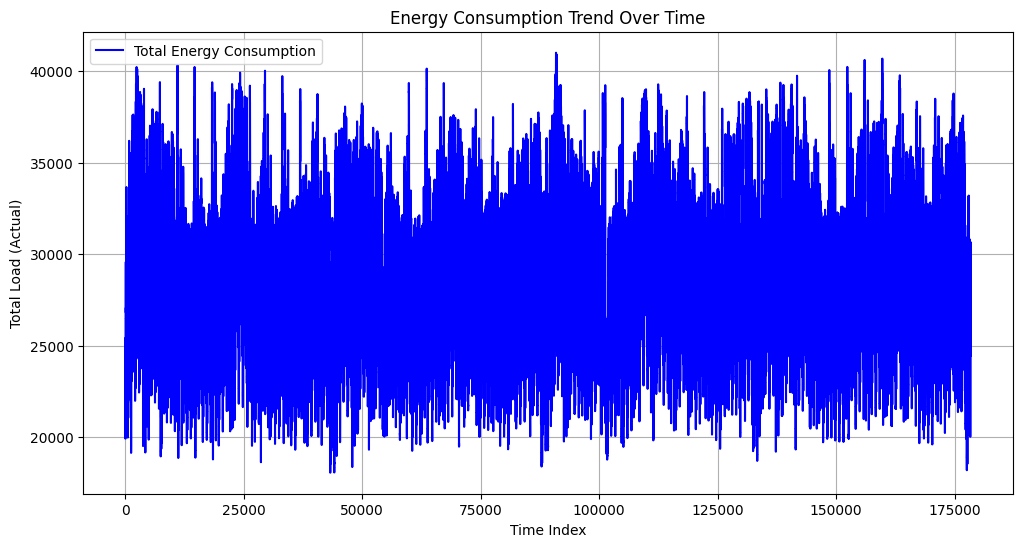

In [ ]:
import matplotlib.pyplot as plt

# Plotting the total load actual trend over time
plt.figure(figsize=(12, 6))
plt.plot(lstm_data.index, lstm_data['total load actual'], color='blue', label='Total Energy Consumption')
plt.title('Energy Consumption Trend Over Time')
plt.xlabel('Time Index')
plt.ylabel('Total Load (Actual)')
plt.legend()
plt.grid(True)
plt.show()

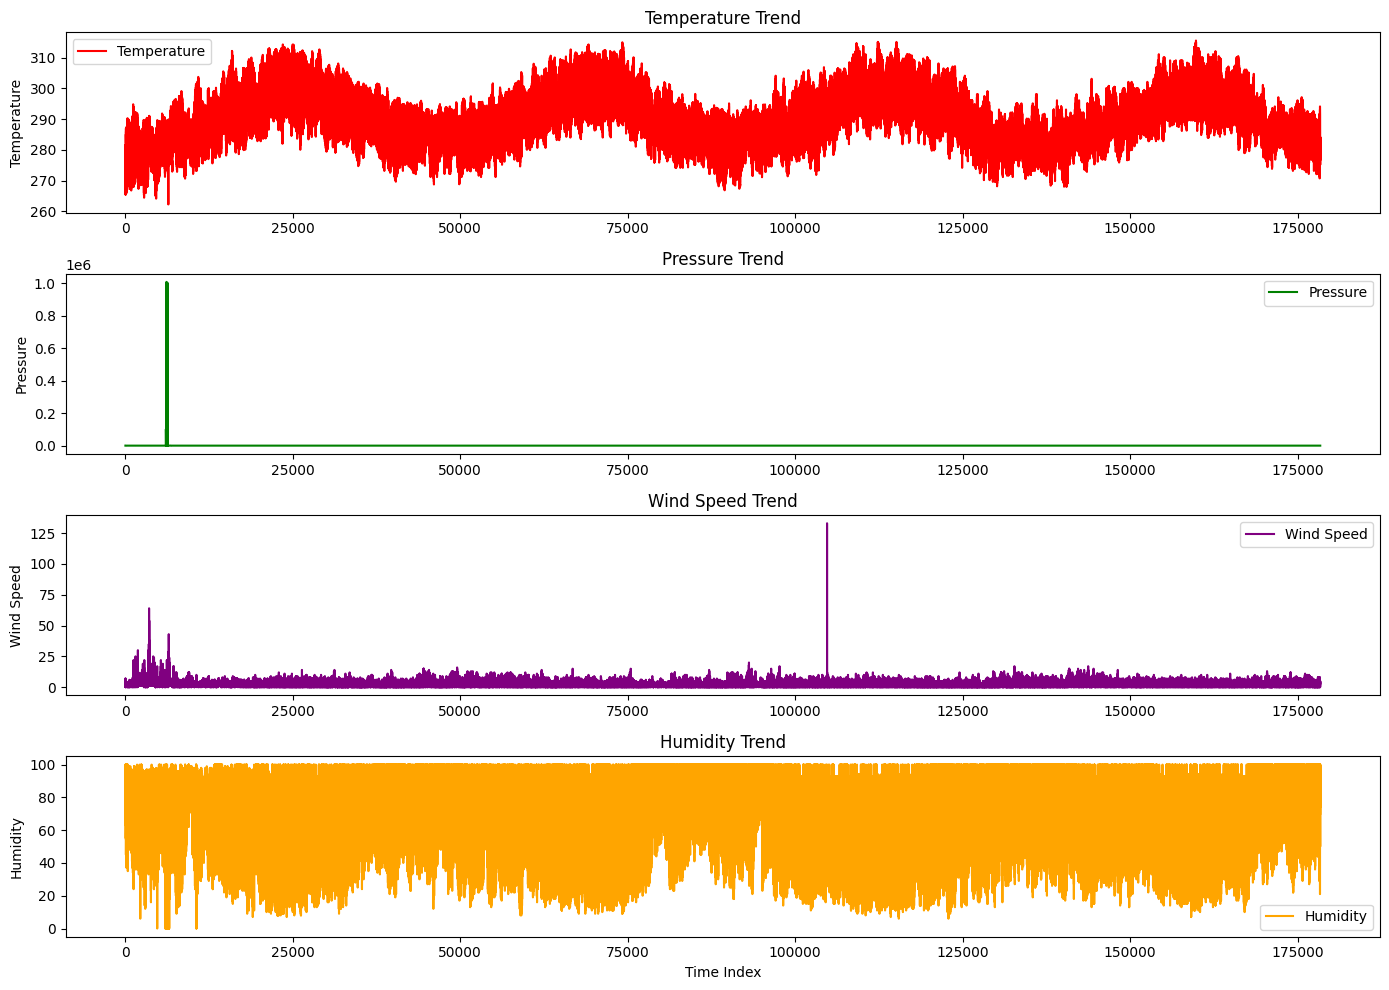

In [ ]:
import matplotlib.pyplot as plt

# Set up figure for plotting weather trends
plt.figure(figsize=(14, 10))

# Plot temperature trend over time
plt.subplot(4, 1, 1)
plt.plot(lstm_data.index, lstm_data['temp'], color='red', label='Temperature')
plt.ylabel('Temperature')
plt.title('Temperature Trend')
plt.legend()

# Plot pressure trend over time
plt.subplot(4, 1, 2)
plt.plot(lstm_data.index, lstm_data['pressure'], color='green', label='Pressure')
plt.ylabel('Pressure')
plt.title('Pressure Trend')
plt.legend()

# Plot wind speed trend over time
plt.subplot(4, 1, 3)
plt.plot(lstm_data.index, lstm_data['wind_speed'], color='purple', label='Wind Speed')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Trend')
plt.legend()

# Plot humidity trend over time
plt.subplot(4, 1, 4)
plt.plot(lstm_data.index, lstm_data['humidity'], color='orange', label='Humidity')
plt.xlabel('Time Index')
plt.ylabel('Humidity')
plt.title('Humidity Trend')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate correlation between each weather variable and total energy consumption
correlations = lstm_data[['temp', 'pressure', 'wind_speed', 'humidity', 'total load actual']].corr()

# Display correlation of total load with each weather variable
print("Correlation of Total Energy Consumption with Weather Variables:")
print(correlations['total load actual'].drop('total load actual'))

Correlation of Total Energy Consumption with Weather Variables:
temp          0.181253
pressure     -0.000991
wind_speed    0.126261
humidity     -0.245273
Name: total load actual, dtype: float64


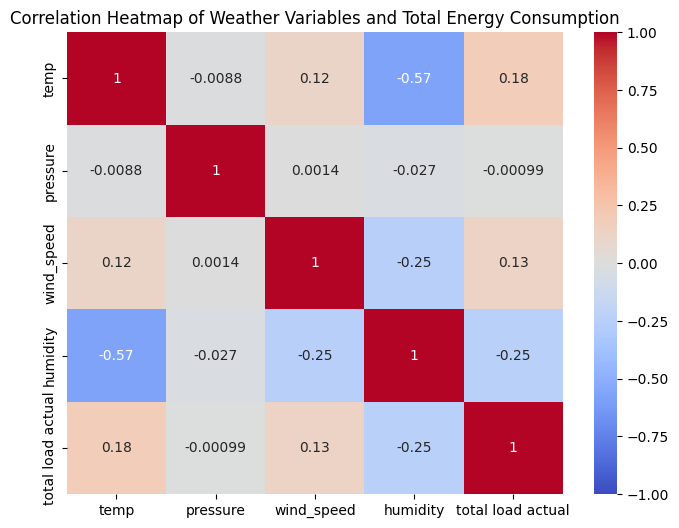

In [ ]:
import seaborn as sns

# Compute the correlation matrix for the relevant variables
correlation_matrix = lstm_data[['temp', 'pressure', 'wind_speed', 'humidity', 'total load actual,']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Weather Variables and Total Energy Consumption")
plt.show()

The heatmap showing the correlations among temperature, pressure, wind speed, humidity, and total energy consumption. This visualization highlights the strength and direction of each relationship, making it easy to see that temperature has the strongest positive correlation with energy consumption, while humidity has a modest negative correlation.

In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load the datasets
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

# Step 2: Convert time columns to datetime
# For columns with mixed time zones, convert them to UTC first
energy_df['time'] = pd.to_datetime(energy_df['time'], errors='coerce', utc=True)
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], errors='coerce', utc=True)

# Remove any timezone information after conversion
energy_df['time'] = energy_df['time'].dt.tz_localize(None)
weather_df['dt_iso'] = weather_df['dt_iso'].dt.tz_localize(None)

# Step 3: Merge the datasets on time
merged_df = pd.merge(energy_df, weather_df, left_on='time', right_on='dt_iso', how='inner')

# Step 4: Drop redundant columns
merged_df.drop(columns=['dt_iso', 'city_name'], inplace=True)

# Step 5: Handle missing values
merged_df.fillna(method='ffill', inplace=True)

# Step 6: Feature Engineering - Extract time-based features
merged_df['hour'] = merged_df['time'].dt.hour
merged_df['day_of_week'] = merged_df['time'].dt.dayofweek
merged_df['month'] = merged_df['time'].dt.month

# Step 7: Cluster cities based on weather patterns (KMeans)
weather_features = merged_df[['temp', 'wind_speed', 'humidity', 'pressure','clouds_all']]
scaler = StandardScaler()
weather_features_scaled = scaler.fit_transform(weather_features)

kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['weather_cluster'] = kmeans.fit_predict(weather_features_scaled)
print(merged_df.head())
merged_df.to_csv('output.csv', index=False)

<ipython-input-10-2c49dd614866>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


                 time  generation biomass  \
0 2014-12-31 23:00:00               447.0   
1 2014-12-31 23:00:00               447.0   
2 2014-12-31 23:00:00               447.0   
3 2014-12-31 23:00:00               447.0   
4 2014-12-31 23:00:00               447.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 329.0                                 0.0   
2                                 329.0                                 0.0   
3                                 329.0                                 0.0   
4                                 329.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 4844.0                       4821.0                  162.0   
2             

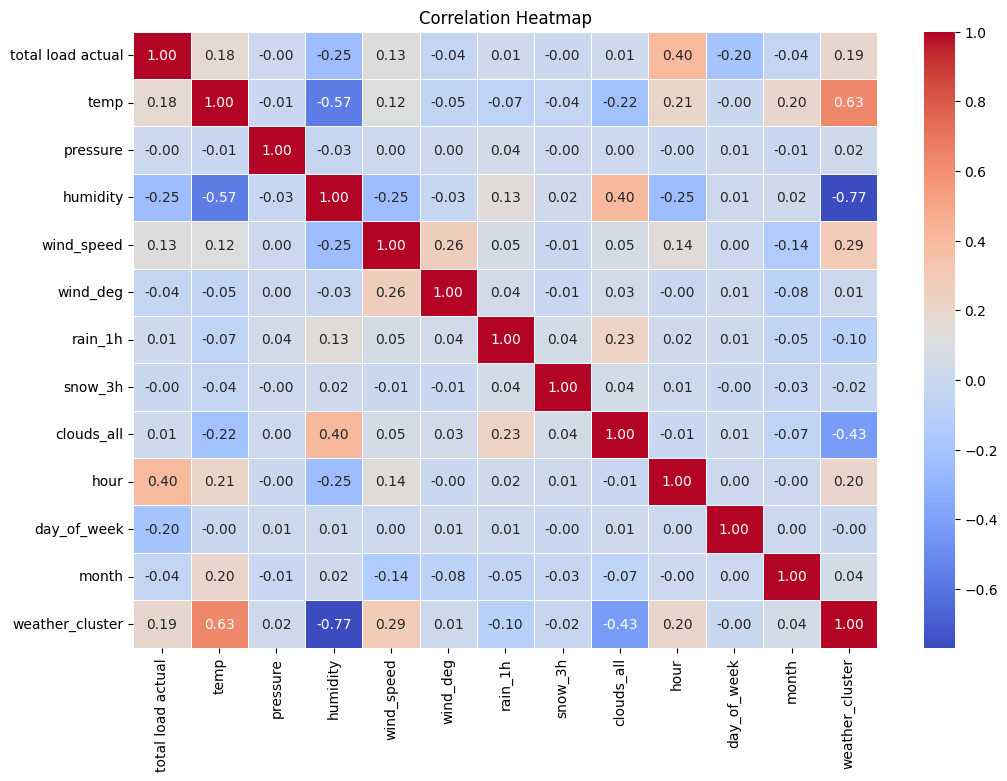

In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

# Step 1: Load the datasets
final_df = pd.read_csv('output (3).csv')
# Compute the correlation matrix
correlation_matrix = final_df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()
